# <h1> Training and testing using KSP22</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Six_Schools.xlsx"
df = pd.ExcelFile(filepath)

In [ ]:
df.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [ ]:
dfksp22 = df.parse('KSP22')
dfksp22.head()

,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2601,F,33,UP,Noida,Hindi,170,73,25.259516,NaN,NaN,Height_cm,Weight_Kg,BMI
1,1332,M,24,West Bengal,Barddhaman,Bengali,171,72,24.622961,NaN,Height_cm,1,NaN,NaN
2,1350,M,25,Uttarakhand,Dehradun,Hindi,172,80,27.041644,NaN,Weight_Kg,0.710777,1,NaN
3,2213,F,36,Maharashtra,Mumbai,Bengali,157,55,22.313278,NaN,BMI,0.303973,0.882849,1
4,2562,M,23,Gujarat,Rajkot,Gujarati,172,64,21.633315,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfksp22 = dfksp22.drop(dfksp22[['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',	'Unnamed: 12',	'Unnamed: 13']], axis = 1)

In [ ]:
dfksp22.describe()

,ID,Age,Height_cm,Weight_Kg,BMI
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2131.705882,25.705882,165.235294,69.000000,25.101692
std,521.355776,4.268558,8.310606,14.252193,3.788278
min,1332.000000,21.000000,147.000000,47.000000,19.067711
25%,1542.000000,23.000000,157.000000,58.000000,22.313278
50%,2328.000000,24.000000,170.000000,72.000000,24.622961
75%,2403.000000,28.000000,171.000000,75.000000,27.041644
max,2903.000000,36.000000,177.000000,100.000000,31.919308


In [ ]:
dfksp22.columns

Index(['ID', 'Sex', 'Age', 'Home_state', 'Home_town', 'Mother_tongue',
       'Height_cm', 'Weight_Kg', 'BMI'],
      dtype='object')

In [ ]:
dfksp22['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
dfksp22.shape

(17, 9)

In [ ]:
dfksp22.isnull().sum()

ID               0
Sex              0
Age              0
Home_state       0
Home_town        0
Mother_tongue    0
Height_cm        0
Weight_Kg        0
BMI              0
dtype: int64

<ipython-input-13-8279283752d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfksp22.corr())


<Axes: >

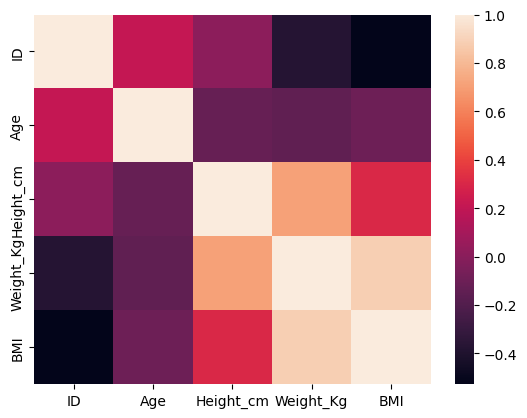

In [ ]:
sns.heatmap(dfksp22.corr())

<Axes: xlabel='Weight_Kg', ylabel='BMI'>

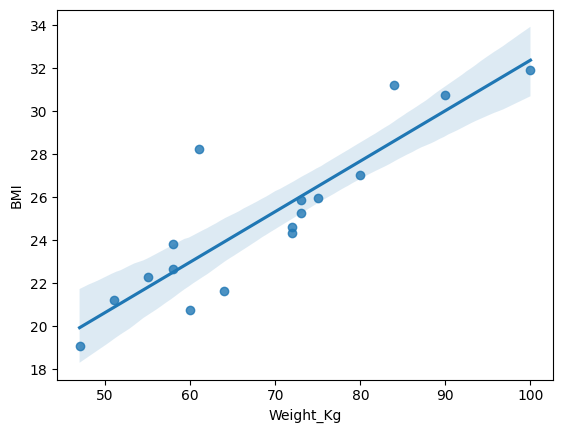

In [ ]:
sns.regplot(data = dfksp22, x = 'Weight_Kg', y = 'BMI')

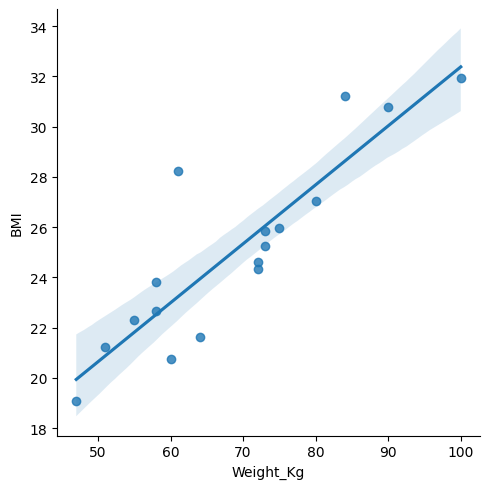

In [ ]:
sns.lmplot(data = dfksp22, x = 'Weight_Kg', y = 'BMI')

In [ ]:
dfksp22 = dfksp22[['Height_cm',	'Weight_Kg', 'BMI']]

In [ ]:
X = dfksp22[['Height_cm', "Weight_Kg"]]
y = dfksp22['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.9540823019307311


In [ ]:
y_pred[:5]

array([24.36025321, 25.75069152, 20.38100348, 21.90670115, 19.84178294])

Trained using KSP22 and tested using 30% of KSP22 dataset. 95% R2 score seems fine and it seems to be predicting very close to the correct bmi values in the dataset.

# **<h1>Using KSP22 for training and Puma Indian for testing</h1>**

In [ ]:
Puma_Indian = df.parse('Puma_Indian')

In [ ]:
Puma_Indian.head()

,Height_cm,Weight_Kg,Age,male,Sex,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
0,53.9750,4.252425,0.0,0,F,NaN,53.975,NaN,50.0
1,55.8800,4.847765,0.0,0,F,NaN,179.070,NaN,60.0
2,56.5150,5.159609,0.0,0,F,NaN,NaN,NaN,70.0
3,59.6138,5.896696,1.0,0,F,NaN,NaN,NaN,80.0
4,60.4520,5.669900,1.0,1,M,NaN,NaN,NaN,90.0


In [ ]:
Puma_Indian = Puma_Indian.drop(Puma_Indian[['Age','male','Sex','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'ht_bin']], axis = 1)

In [ ]:
Puma_Indian.head()

,Height_cm,Weight_Kg
0,53.9750,4.252425
1,55.8800,4.847765
2,56.5150,5.159609
3,59.6138,5.896696
4,60.4520,5.669900


In [ ]:
dfksp22.tail()

,Height_cm,Weight_Kg,BMI
12,172,72,24.337480
13,157,47,19.067711
14,168,73,25.864512
15,164,84,31.231410
16,147,61,28.228979


In [ ]:
X_train = dfksp22[['Height_cm', 'Weight_Kg']]
y_train = dfksp22['BMI']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = Puma_Indian[['Height_cm', 'Weight_Kg']]
predicted_bmi = model.predict(X_test)

In [ ]:
r3 = model.score(X_train, y_train)
print("R2 Score:", r3)

R2 Score: 0.9909755223476352


In [ ]:
predicted_bmi[:3]

array([35.07153763, 34.71698133, 34.63941494])

Predicted values seem very wrong and 99% accuracy just feels suspicious. After checking the actual bmi, predicted values are wrong.

Reasons it may be wrong:


1.   KSP22 data set is very small to train the model on. (17 rows and 9 columns)
2.   KSP22 seems to only have mostly adult heights and weights and may cause the predicted results to be very skewed(?) if expected to predict values for vast datasets like puma indian (500+ rows) containing kiddie heights and weights as well.
3. We may be overfitting the model for KSP22 which doesn't contain as many different values as Puma Indian

Conditions that may/may-not fix it(?)

1.   This limitation is caused by a small dataset. Can be fixed by using more diverse and bigger datasets.
2.   Setting aside the smaller datasets for testing and picking the most efficient dataset to train the model on.
3. ???





# **<h1>Training and testing using puma indian</h1>**

Training using KSP22 dataset was inefficient due to small size. Trying using Puma Indian dataset then proceed to test with KSP22.

In [ ]:
Puma_Indian

,Height_cm,Weight_Kg
0,53.9750,4.252425
1,55.8800,4.847765
2,56.5150,5.159609
3,59.6138,5.896696
4,60.4520,5.669900
...,...,...
539,171.1198,56.557252
540,171.4500,56.557252
541,172.7200,61.801910
542,172.9994,51.255896


In [ ]:
df2 = Puma_Indian.copy()

In [ ]:
df2.head()

,Height_cm,Weight_Kg
0,53.9750,4.252425
1,55.8800,4.847765
2,56.5150,5.159609
3,59.6138,5.896696
4,60.4520,5.669900


In [ ]:
true_bmi = lambda row: row['Weight_Kg'] / ((row['Height_cm'] / 100) ** 2)

In [ ]:
df2['bmi'] = df2.apply(true_bmi, axis = 1)

In [ ]:
df2.tail()

,Height_cm,Weight_Kg,bmi
539,171.1198,56.557252,19.314691
540,171.4500,56.557252,19.240366
541,172.7200,61.801910,20.716512
542,172.9994,51.255896,17.125949
543,179.0700,55.706767,17.372499


In [ ]:
X = df2[['Height_cm', 'Weight_Kg']]
y = df2['bmi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted[:5]

array([16.39186271, 14.15608721, 18.5643139 , 15.31402108, 20.22696513])

In [ ]:
r4 = model.score(X_test, y_test)
print("R2 Score: ", r4)

R2 Score:  0.9172398256856862


Seems fine so far. Next we try training using Puma Indian and testing using KSP22.

# **<h1>Using Puma Indian for training and KSP22 for testing</h1>**

In [ ]:
X_train = df2[['Height_cm', 'Weight_Kg']]
y_train = df2['bmi']

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = dfksp22[['Height_cm', 'Weight_Kg']]
pred_bmi = model.predict(X_test)

In [ ]:
pred_bmi[:5]

array([27.46064048, 26.9259577 , 29.91091   , 22.28832918, 23.65378095])

In [ ]:
r5 = model.score(X_train, y_train)
print("R2 Score: ", r5)

R2 Score:  0.9232672353144258


92% seems fine.